In [423]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

In [424]:
# Read Whales Returns
whale_returns_csv = Path("Resources/whale_returns.csv")
# Your code here
whale_returns = pd.read_csv(whale_returns_csv, infer_datetime_format=True, parse_dates=True, index_col="Date")
whale_returns.head(5)

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [425]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [426]:
# Drop nulls
whale_returns.dropna(inplace = True)

In [427]:
# Your code here
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [428]:
algo_returns_csv = Path("Resources/algo_returns.csv")
# Your code here
algo_returns = pd.read_csv(algo_returns_csv, infer_datetime_format=True, parse_dates=True, index_col="Date")
algo_returns.head(5)

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [429]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [430]:
# Drop nulls
algo_returns.dropna(inplace = True)

In [431]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [432]:
sp500_history_csv = Path("Resources/sp500_history.csv")
# Your code here
sp500_history = pd.read_csv(sp500_history_csv, infer_datetime_format=True, parse_dates=True, index_col="Date")
sp500_history.head(5)

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [433]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [434]:
# Fix Data Types
sp500_history["Close"] = sp500_history["Close"].str.replace("$", " ")
sp500_history["Close"] = sp500_history["Close"].astype("float")

In [435]:
sp500_history.dtypes

Close    float64
dtype: object

In [436]:
# Calculate Daily Returns
sp500_history = sp500_history.sort_index(ascending=True)
sp500_daily_returns = sp500_history.pct_change()
sp500_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [437]:
# Drop nulls
sp500_daily_returns.dropna()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [438]:
# Rename Column
sp500_daily_returns = sp500_daily_returns.rename(columns=({'Close':'S&P 500'}))

In [439]:
# Concatenate all DataFrames into a single DataFrame
total_daily_returns = pd.concat([whale_returns, algo_returns, sp500_daily_returns], axis="columns", join="inner")
total_daily_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


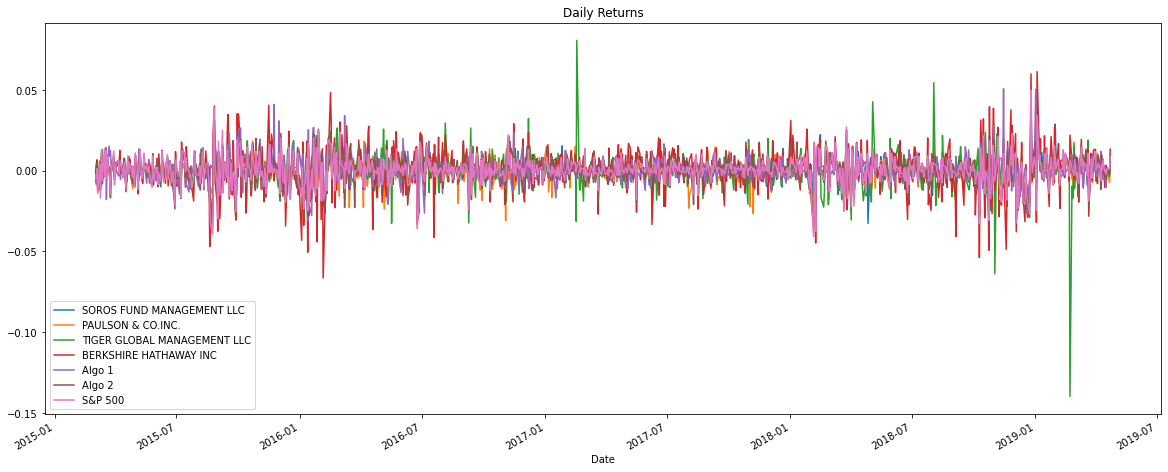

In [440]:
# Plot daily returns
total_daily_returns.plot(title="Daily Returns",figsize=(20,8))

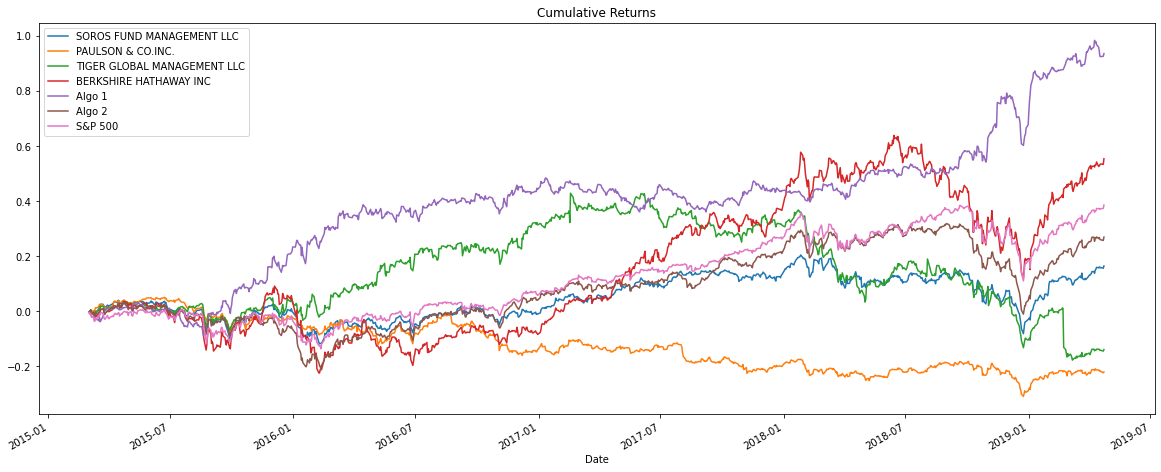

In [441]:
# Plot cumulative returns
cumulative_returns = (1 + total_daily_returns).cumprod() - 1
cumulative_returns.plot(title="Cumulative Returns", figsize=(20,8))

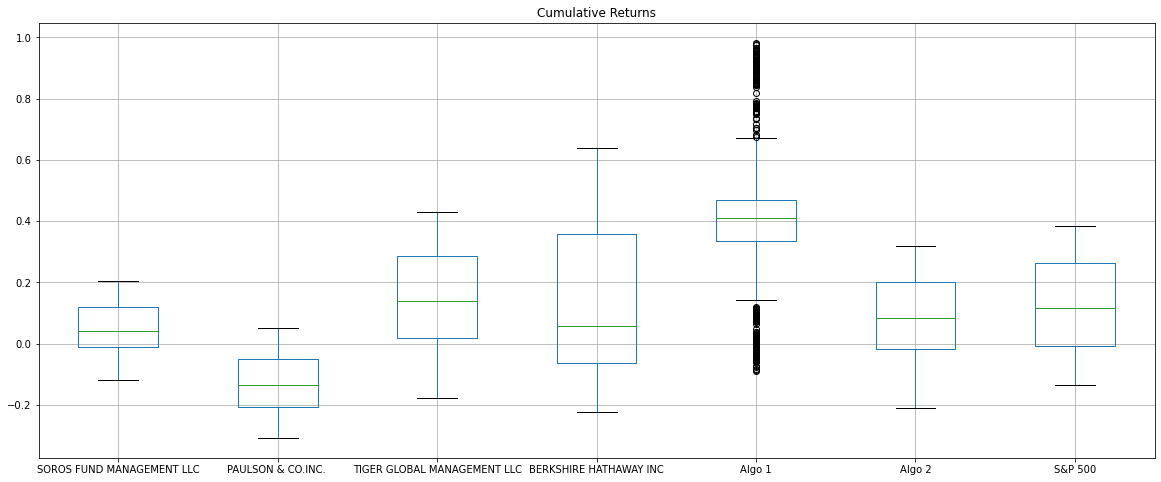

In [442]:
# Boxplot to visually show risk
cumulative_returns_boxplot = cumulative_returns.boxplot(figsize=(20,8)).set_title('Cumulative Returns')

In [443]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

daily_stdev = total_daily_returns.std()
daily_stdev

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [444]:
# Determine which portfolios are riskier than the S&P 500
for std in daily_stdev:
    if std > 0.008554:
        print("True")
    elif std < 0.008554:
        print("False")

False
False
True
True
False
False
False


In [445]:
# Calculate the annualized standard deviation (252 trading days)
annualized_stdev = daily_stdev * np.sqrt(252)
annualized_stdev

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

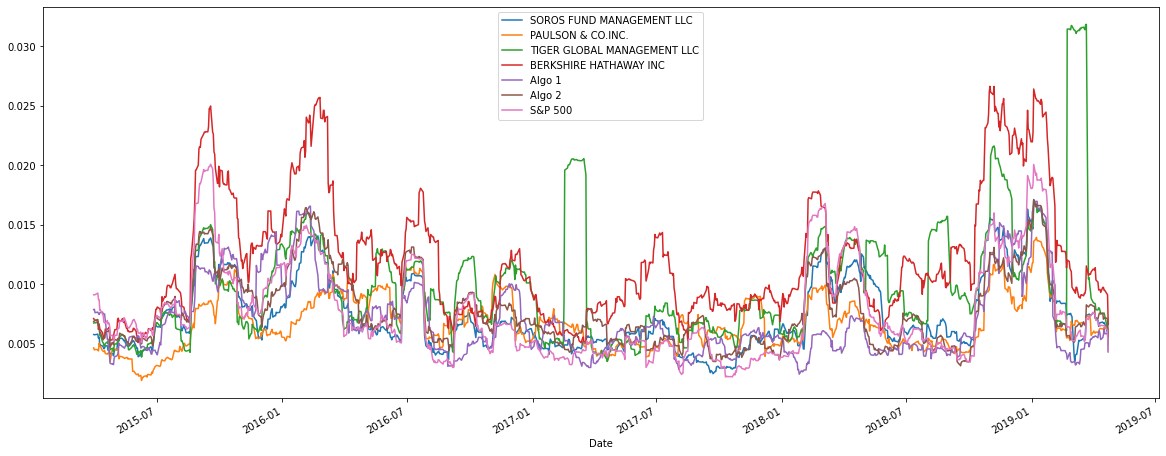

In [446]:
# Calculate and plot the rolling standard deviation for the S&P 500 and whale portfolios using a 21 trading day window
total_daily_returns.rolling(window=21).std().plot(figsize=(20,8))

In [447]:
# Construct a correlation table
correlation = total_daily_returns.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


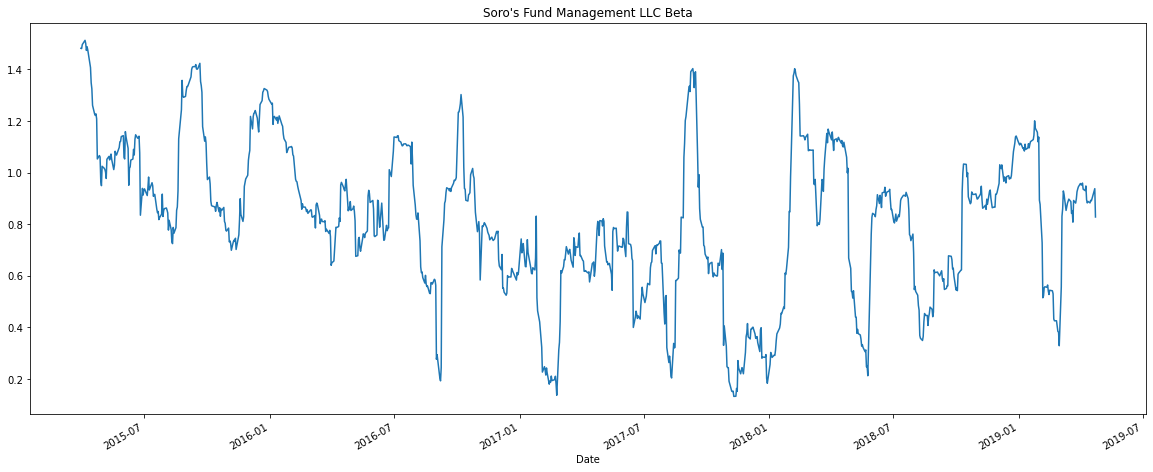

In [448]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
rolling_covariance = total_daily_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=21).cov(total_daily_returns["S&P 500"])
rolling_variance = total_daily_returns["SOROS FUND MANAGEMENT LLC"].rolling(window=21).var()
bhi_beta = rolling_covariance / rolling_variance
bhi_beta.plot(figsize=(20,8), title="Soro's Fund Management LLC Beta")

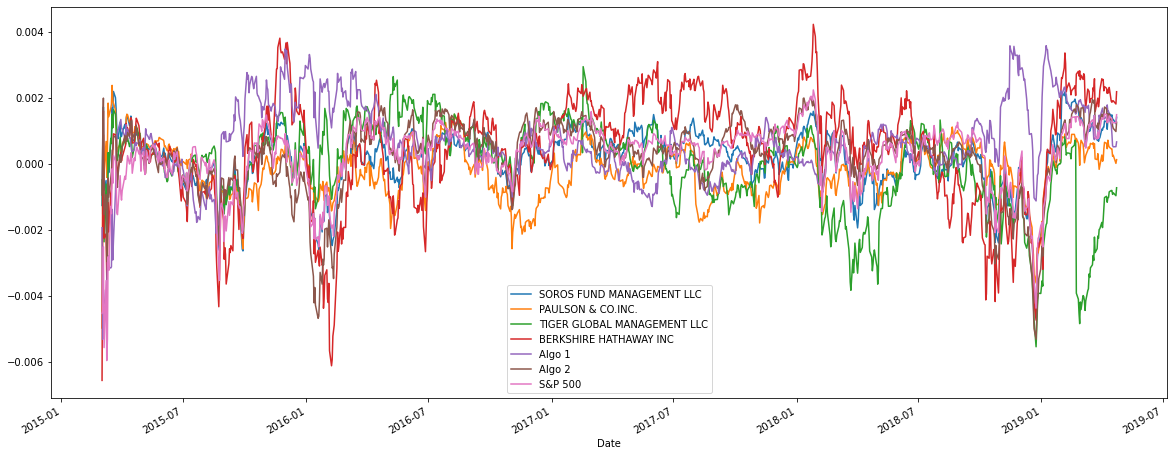

In [449]:
# Calculate a rolling window using the exponentially weighted moving average.
expo_weighted_moving_average = total_daily_returns.ewm(halflife=21).mean().plot(figsize=(20,8))
############## COME BACK TO THIS


In [450]:
# Calculate annualized Sharpe Ratios
sharpe_ratio = (total_daily_returns.mean() * 252) / (total_daily_returns.std() * np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

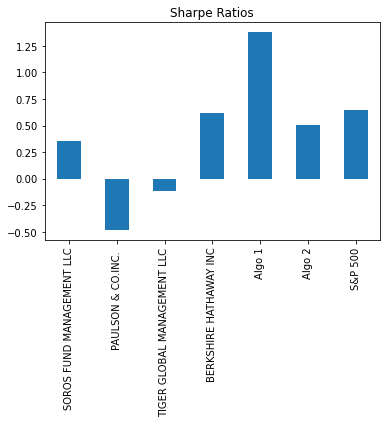

In [451]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind="bar",title="Sharpe Ratios")

In [452]:
# Read the first stock
aapl_historical_csv = Path("Resources/aapl_historical.csv")
# Your code here
aapl = pd.read_csv(aapl_historical_csv, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE")
aapl.head(5)

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [453]:
# Read second stock
cost_historical_csv = Path("Resources/cost_historical.csv")
# Your code here
cost = pd.read_csv(cost_historical_csv, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE")
cost.head(5)

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [454]:
# Read third stock
goog_historical_csv = Path("Resources/goog_historical.csv")
# Your code here
goog = pd.read_csv(goog_historical_csv, infer_datetime_format=True, parse_dates=True, index_col="Trade DATE")
goog.head(5)

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [455]:
 # Concatenate all stocks into a single DataFrame
 custom_portfilio = pd.concat([goog, aapl, cost], axis="rows", join="inner")
 custom_portfilio

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [456]:
# Reset the index
custom_portfilio.reset_index()

,Trade DATE,Symbol,NOCP
0,2019-05-09,GOOG,1162.38
1,2019-05-08,GOOG,1166.27
2,2019-05-07,GOOG,1174.10
3,2019-05-06,GOOG,1189.39
4,2019-05-03,GOOG,1185.40
...,...,...,...
745,2018-05-17,COST,199.60
746,2018-05-16,COST,198.71
747,2018-05-15,COST,195.48
748,2018-05-14,COST,195.88


In [457]:
# Pivot so that each column of prices represents a unique symbol
custom_pivoted = custom_portfilio.pivot(index=None, columns="Symbol")
custom_pivoted

NOCP                 
Symbol        AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59
...            ...     ...      ...
2019-05-03  211.75  244.62  1185.40
2019-05-06  208.48  244.23  1189.39
2019-05-07  202.86  240.18  1174.10
2019-05-08  202.90  241.34  1166.27
2019-05-09  200.72  243.47  1162.38

[250 rows x 3 columns]

In [458]:
# Drop nulls
custom_pivoted.dropna()

NOCP                 
Symbol        AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59
...            ...     ...      ...
2019-05-03  211.75  244.62  1185.40
2019-05-06  208.48  244.23  1189.39
2019-05-07  202.86  240.18  1174.10
2019-05-08  202.90  241.34  1166.27
2019-05-09  200.72  243.47  1162.38

[250 rows x 3 columns]

In [459]:
# Calculate weighted portfolio returns
weights = [.333333333333, .333333333333, .333333333333]
pct_change = custom_pivoted.pct_change()
weighted_returns = weights * pct_change
weighted_returns_daily = weighted_returns.sum(axis=1)
weighted_returns_daily

Trade DATE
2018-05-11    0.000000
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 250, dtype: float64

In [460]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
total_portfilio = pd.concat([total_daily_returns, weighted_returns_daily], axis="columns", join="inner")
total_portfilio.rename(columns={ 0:'Custom'}, inplace=True)
total_portfilio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,0.000000
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [461]:
 # Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfilio.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-11,-0.004717,0.000982,0.002624,-0.004125,0.000358,0.000281,0.001708,0.000000
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217


In [462]:
# Risk
total_daily_stdev = total_portfilio.std()
total_annualized_stdev = total_daily_stdev * np.sqrt(252)
total_annualized_stdev

SOROS FUND MANAGEMENT LLC      0.146455
PAULSON & CO.INC.              0.116489
TIGER GLOBAL MANAGEMENT LLC    0.232069
BERKSHIRE HATHAWAY INC         0.246672
Algo 1                         0.133423
Algo 2                         0.139262
S&P 500                        0.151739
Custom                         0.211050
dtype: float64

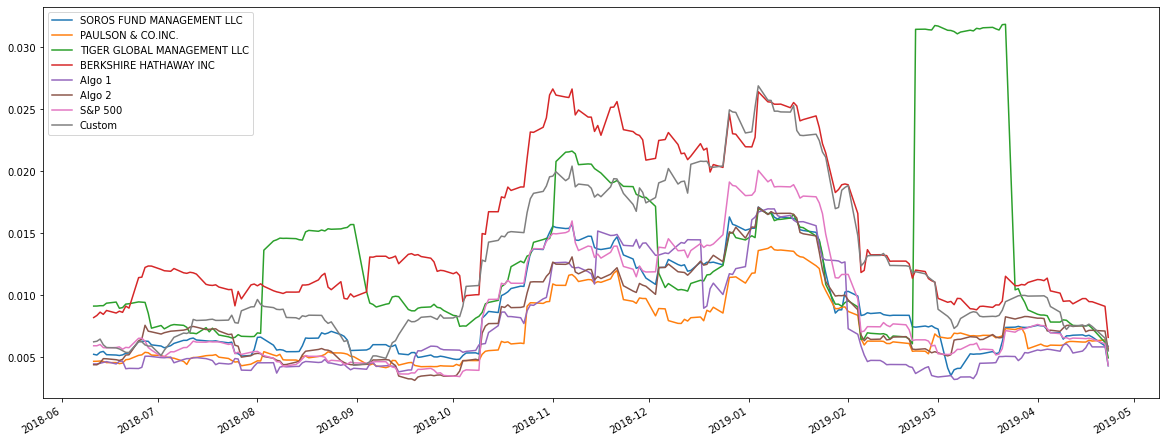

In [463]:
# Rolling
total_portfilio.rolling(window=21).std().plot(figsize=(20,8))

In [464]:
# Annualized Sharpe Ratios
total_sharpe_ratio = (total_portfilio.mean() * 252) / (total_portfilio.std() * np.sqrt(252))
total_sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.395449
PAULSON & CO.INC.              0.267115
TIGER GLOBAL MANAGEMENT LLC   -1.019946
BERKSHIRE HATHAWAY INC         0.141691
Algo 1                         2.034208
Algo 2                         0.082577
S&P 500                        0.595486
Custom                         0.931162
dtype: float64

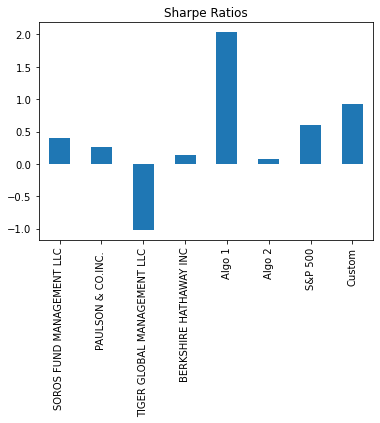

In [465]:
# Visualize the sharpe ratios as a bar plot
total_sharpe_ratio.plot(kind="bar",title="Sharpe Ratios")

In [466]:
# Create a correlation analysis
total_correlation = total_portfilio.corr()
total_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791191,0.477722,0.816670,0.337809,0.862258,0.876089,0.732932
PAULSON & CO.INC.,0.791191,1.000000,0.485421,0.650499,0.361243,0.783646,0.766696,0.644157
TIGER GLOBAL MANAGEMENT LLC,0.477722,0.485421,1.000000,0.325080,0.114449,0.409472,0.481095,0.391859
BERKSHIRE HATHAWAY INC,0.816670,0.650499,0.325080,1.000000,0.327043,0.782646,0.851968,0.801092
Algo 1,0.337809,0.361243,0.114449,0.327043,1.000000,0.365496,0.289290,0.261486
Algo 2,0.862258,0.783646,0.409472,0.782646,0.365496,1.000000,0.875699,0.739923
S&P 500,0.876089,0.766696,0.481095,0.851968,0.289290,0.875699,1.000000,0.871797
Custom,0.732932,0.644157,0.391859,0.801092,0.261486,0.739923,0.871797,1.000000


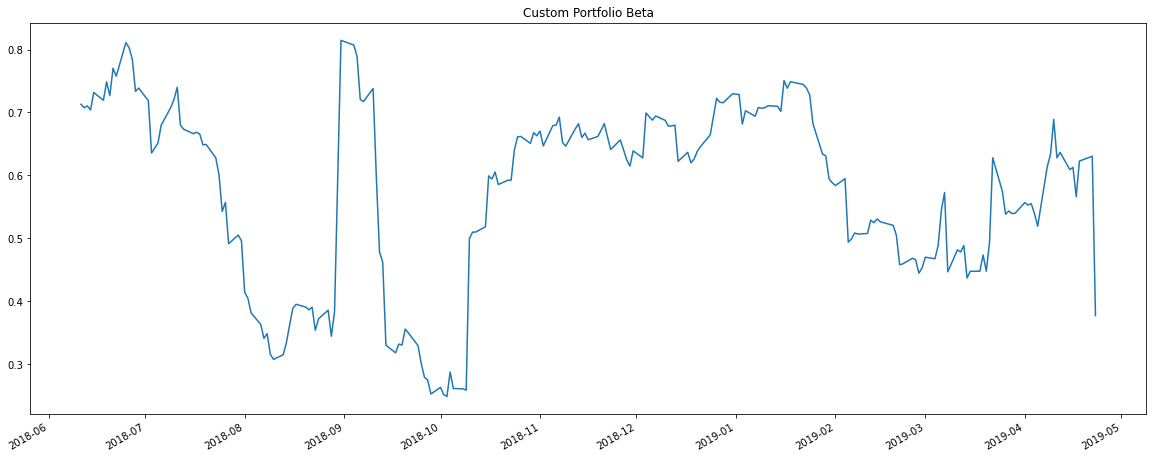

In [467]:
# Beta
total_rolling_cov = total_portfilio["Custom"].rolling(window=21).cov(total_portfilio["S&P 500"])
total_rolling_var = total_portfilio["Custom"].rolling(window=21).var()
custom_portfolio_beta = total_rolling_cov / total_rolling_var
custom_portfolio_beta.plot(figsize=(20,8), title="Custom Portfolio Beta")